# PreProcessing 

the folowing lines of code will help to preprocess all the data

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/karthikrajesh/PycharmProjects/DeepLOF/IISC_analysis/FinalDF_organismal.csv")

In [3]:
df['onlyCellularEssential'] = ((df['Essentiality test'] == 1) & (df['CL'] == 0)).astype(int)
df = df.drop(columns = ["Gene ID"])

print(df.columns)

Index(['ensembl', 'gene_symbol_x', 'obs_lof', 'exp_lof', 'UNEECON.G',
       'protein_complex', 'transcript_factor', 'reactome_nervous_development',
       'reactome_developmental_biology', 'GO_central_neurvous_development',
       'GO_embryo_development', 'cpg_density', 'promoter_phastcons',
       'exonic_phastcons', 'PPI_degree', 'gene_expression_level',
       'tissue_specificity_tau', 'enhancer_number', 'h3k4me3', 'h2az',
       'h3k27me3', 'h3k9ac', 'Essentiality test', 'VP', 'VN', 'CL', 'SP', 'DL',
       'Organismal Essentiality test', 'gene_symbol_y', 'DeepLOF_score',
       'onlyCellularEssential'],
      dtype='object')


## Getting Subcategories
here we split the data into various subcategories on which we can perform all the different analysis on


In [4]:
dfprotien = df[(df['protein_complex'] == 1)]
dftranscription=df[(df["transcript_factor"]==1)]
dfreactome_nervous_dev = df[(df['reactome_nervous_development'] == 1)]
dfreactome_nervous_biology = df[(df['reactome_developmental_biology'] == 1)]
dfGOnervous_development = df[(df['GO_central_neurvous_development'] == 1)]
dfembryodev = df[(df['GO_embryo_development'] == 1)]

In [5]:
devlopmentalessential = df[(df['DL'] == 1) & (df['CL'] == 0)]
cellularlessential = df[(df['CL'] == 1)]
Viable_Phenotype = df[(df['VP'] == 1)]
Viable_no_Phenotype = df[(df['VN'] == 1)]
Subviable = df[(df['SP'] == 1)]
only_Cell_Essential = df[(df['onlyCellularEssential'] == 1 )]

## Some important Points

* The first classification is based on the simple idea of where the genes tend to get expressed
* The CL genes are both essential for cellular as well as developmental
* The DL genes are only Organisomal Essential Genes

In [6]:
print(len(devlopmentalessential))

4576


In [7]:
df

,ensembl,gene_symbol_x,obs_lof,exp_lof,UNEECON.G,protein_complex,transcript_factor,reactome_nervous_development,reactome_developmental_biology,GO_central_neurvous_development,...,Essentiality test,VP,VN,CL,SP,DL,Organismal Essentiality test,gene_symbol_y,DeepLOF_score,onlyCellularEssential
0,ENSG00000001084,GCLC,8,36.0410,1.575263,1,0,0,0,0,...,1,0,0,0,0,0,0,GCLC,0.786323,1
1,ENSG00000001167,NFYA,6,23.2880,2.179792,1,0,0,0,0,...,1,0,0,0,0,0,0,NFYA,0.814284,1
2,ENSG00000001626,CFTR,84,77.0460,-1.204712,1,0,0,0,0,...,1,0,0,0,0,0,0,CFTR,0.047685,1
3,ENSG00000001630,CYP51A1,14,21.6510,-0.430866,0,0,1,1,0,...,1,0,0,0,0,0,0,CYP51A1,0.463171,1
4,ENSG00000001631,KRIT1,14,43.8340,0.845937,1,0,0,0,0,...,1,0,0,0,0,1,1,KRIT1,0.694919,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17470,ENSG00000272968,RBAK-RBAKDN,1,5.9484,-0.323925,0,0,0,0,0,...,0,0,0,0,0,0,0,RBAK-RBAKDN,0.564288,0
17471,ENSG00000273045,C2orf15,5,4.3675,-0.804423,0,0,0,0,0,...,0,0,0,0,0,0,0,C2orf15,0.185718,0
17472,ENSG00000273079,GRIN2B,0,48.9460,3.159191,0,0,1,1,1,...,0,0,0,0,0,0,0,GRIN2B,0.973520,0
17473,ENSG00000273173,SNURF,1,5.6699,-0.009011,0,0,0,0,0,...,0,0,0,0,0,0,0,SNURF,0.582475,0


## Analysis

In [15]:
dfprotien1 = devlopmentalessential[devlopmentalessential["protein_complex"] == 1]
dfprotien1not = devlopmentalessential[devlopmentalessential["protein_complex"]==0]

In [11]:
print(len(devlopmentalessential))
print(len(dfprotien1))

4576
682


In [13]:
dfprotien2 = cellularlessential[cellularlessential["protein_complex"]==1]
print(len(cellularlessential))
print(len(dfprotien2))

734
399


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plt_hist(df1 ,df2 , coloumn="DeepLOF_score"):
    plt.figure(figsize=(10, 5))
    sns.histplot(df1[coloumn], color='blue', label='df1', kde=True)
    sns.histplot(df2[coloumn], color='orange', label='df2', kde=True)
    plt.legend()
    plt.title('Distribution of deeplof Scores')
    plt.xlabel('deeplof Score')
    plt.ylabel('Frequency')
    plt.show()


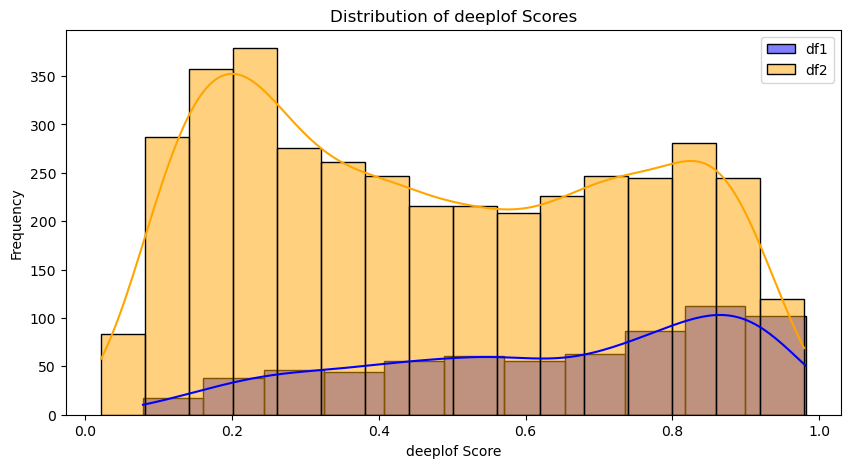

In [20]:
plt_hist(dfprotien1,dfprotien1not)

In [23]:
def plot_violin(df1, df2, column_name):

    df1['Dataset'] = 'df1'
    df2['Dataset'] = 'df2'
    
    combined_df = pd.concat([df1[[column_name, 'Dataset']], df2[[column_name, 'Dataset']]])
    
=
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Dataset', y=column_name, data=combined_df)
    plt.title(f'Violin Plot of {column_name}')
    plt.show()



/var/folders/_d/n8c6bvm9767drj1j5ywz2b5c0000gn/T/ipykernel_37928/1777160078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Dataset'] = 'df1'
/var/folders/_d/n8c6bvm9767drj1j5ywz2b5c0000gn/T/ipykernel_37928/1777160078.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Dataset'] = 'df2'


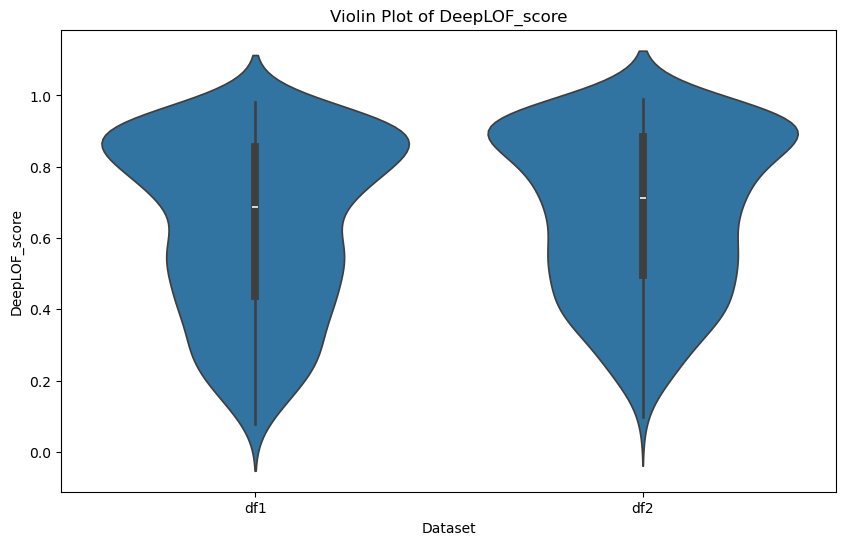

In [24]:
plot_violin(dfprotien1,dfprotien2,"DeepLOF_score")

## Correlation between 2 df's

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    # Drop the 'ensembl' column
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Calculate the correlation matrix
    corr = numeric_df.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(14, 12))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    
    # Set titles and labels
    plt.title('Correlation Heatmap', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # Show the plot
    plt.show()



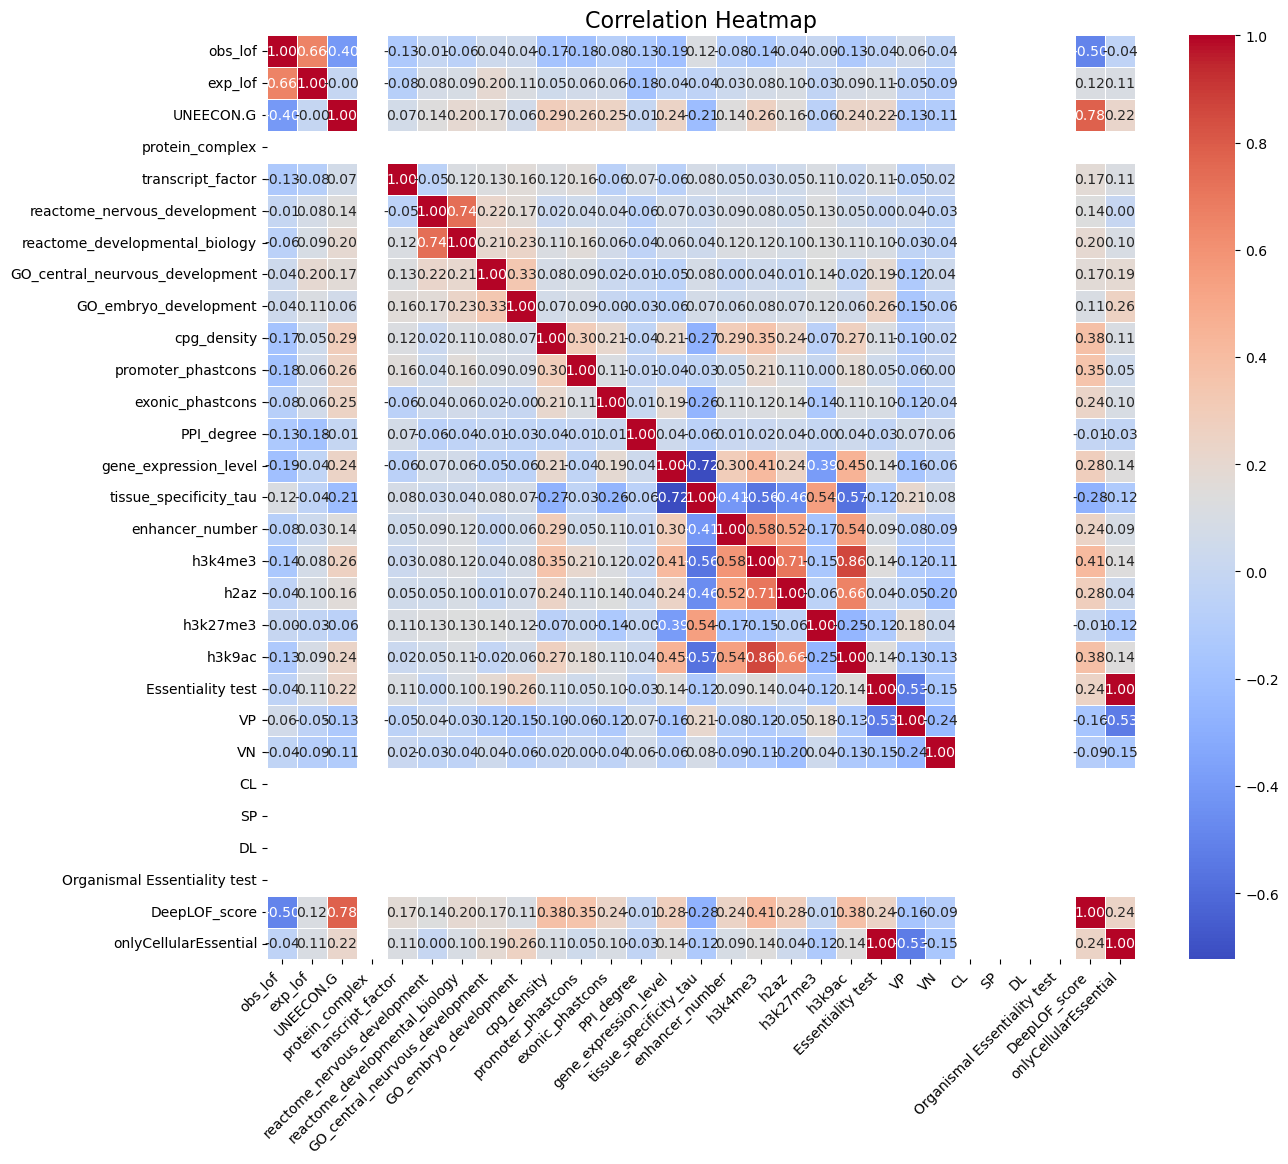

In [45]:
plot_correlation_heatmap(dfprotien1)

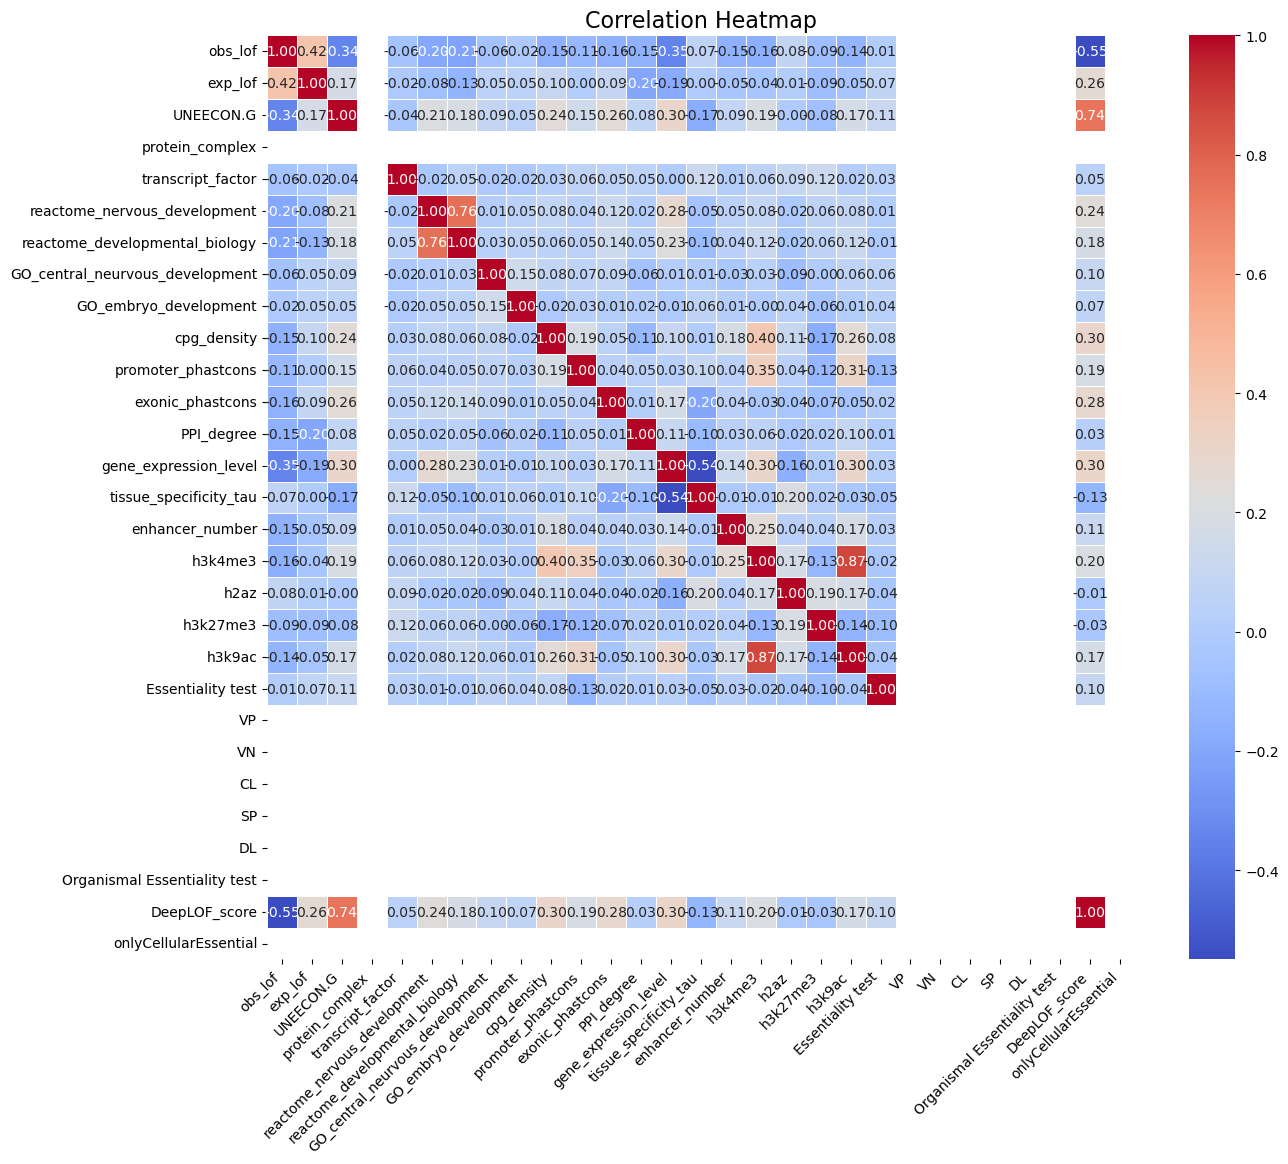

In [44]:
plot_correlation_heatmap(dfprotien2)